In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas_datareader.data as web
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
now_time = datetime.now()
start_time = datetime(now_time.year - 5, now_time.month , now_time.day)
today = str(datetime.now())
next_30_days = datetime.now() + timedelta(days=30)
next_30_days = str(next_30_days)
end_time = str(next_30_days)
end_time

'2020-02-15 03:20:48.957725'

In [3]:
def choosestock(stock_name):
    global stock_df, name
    validInput = False
    while not validInput:
        # Get stock data
        try:
            stock_name = input("Choose a stock by entering the ticker symbol: ")
            stock_df = web.DataReader(stock_name,'yahoo', start_time, now_time)
            validInput = True
            print("validInput = ", validInput)
        except: 
            KeyError
            print("The database could not return a valid result.  Please try again")
    name = stock_name

In [4]:
choosestock(input)
print(f"Firstday: {stock_df.head(1)}")  
print(f"Last Day: {stock_df.tail(1)}")

Choose a stock by entering the ticker symbol: MSFT
validInput =  True
Firstday:                  High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2015-01-16  46.279999  45.169998  45.310001  46.240002  35695300.0  41.512352
Last Day:                   High         Low        Open       Close      Volume  \
Date                                                                     
2020-01-15  163.940002  162.570007  162.619995  163.179993  21391800.0   

             Adj Close  
Date                    
2020-01-15  163.179993  


In [5]:
# Get the Adjusted Close Price
df = stock_df[['Open','Adj Close']]
#df.to_csv('data_stocks.csv')

In [6]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target or dependent variable) shifted 'n' units up
#df['InitialPrediction'] = df[['Adj Close']].shift()
#df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
#print the new data set

In [7]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Adj Close'],1))

#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[ 45.31000137]
 [ 46.29999924]
 [ 45.93999863]
 ...
 [152.33000183]
 [152.1000061 ]
 [151.80999756]]


In [8]:
## Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's.)
y = np.array(df['Adj Close'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y[:-forecast_out])

[ 41.51235199  41.64701462  41.22507095 ... 139.93383789 139.21627808
 136.9440155 ]


In [9]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [10]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9987913922715917


In [12]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9989054241038681


In [14]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Adj Close'],1))[-forecast_out:]
print(x_forecast) 

[[147.49000549]
 [150.13999939]
 [150.05000305]
 [150.99000549]
 [151.07000732]
 [151.28999329]
 [151.53999329]
 [151.6499939 ]
 [153.        ]
 [155.11000061]
 [155.44999695]
 [154.30000305]
 [154.        ]
 [157.3500061 ]
 [158.11999512]
 [157.47999573]
 [157.55999756]
 [159.44999695]
 [158.99000549]
 [156.77000427]
 [158.77999878]
 [158.32000732]
 [157.08000183]
 [159.32000732]
 [158.92999268]
 [161.83999634]
 [162.82000732]
 [161.75999451]
 [163.38999939]
 [162.61999512]]


# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
#x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast[0])

In [15]:
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)
lr_pdf=pd.DataFrame(lr_prediction)
lr_pdf

[146.95722426 149.69564495 149.60264556 150.57401464 150.65668602
 150.88401263 151.1423548  151.25602598 152.65108001 154.83148855
 155.18283012 153.99446244 153.68444869 157.14624007 157.9419226
 157.28056727 157.36323866 159.31630483 158.84096407 156.54688434
 158.62394971 158.14860895 156.86722611 159.18197763 158.77894871
 161.78605535 162.79876801 161.70338396 163.38777995 162.59208166]


,0
0,146.957224
1,149.695645
2,149.602646
3,150.574015
4,150.656686
5,150.884013
6,151.142355
7,151.256026
8,152.651080
9,154.831489


In [16]:
#Error 

#df['InitialPrediction'] = df[['Adj Close']].shift()
Y_orginal= np.array(df.drop(['Open'],1))
Y_true=Y_orginal[-30:]
Y_pred=lr_prediction
#mean_squared_error(Y_orginal[-30:], lr_prediction)
MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
MSE 

rmse=r2_score(Y_true, Y_pred)
rmse

0.909222795655313

In [17]:
# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction) 

[148.15023147 149.72592371 149.7307093  149.83369542 149.88483317
 150.08249791 150.41313637 150.59270605 152.79728511 137.5238548
 132.50637783 147.22658967 149.65012701 106.63928297 100.66918154
 105.41917401 104.71244046  96.01632584  97.02496336 113.1549887
  97.66541016  99.57899528 109.45828049  96.25377886  97.19494841
  94.71564613  94.68668025  94.7208998   94.6829682   94.68928492]


In [18]:
dt=datetime.today().strftime('%Y-%m-%d')

df.tail(30) 
new_df= df.tail(30) 
new_df.head()

,Open,Adj Close
Date,,
2019-12-03,147.490005,149.309998
2019-12-04,150.139999,149.850006
2019-12-05,150.050003,149.929993
2019-12-06,150.990005,151.750000
2019-12-09,151.070007,151.360001


In [19]:
new_df['Prediction']=lr_prediction

C:\Users\mdegu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
new_df.tail()

,Open,Adj Close,Prediction
Date,,,
2020-01-09,161.839996,162.089996,161.786055
2020-01-10,162.820007,161.339996,162.798768
2020-01-13,161.759995,163.279999,161.703384
2020-01-14,163.389999,162.130005,163.387780
2020-01-15,162.619995,163.179993,162.592082


([<matplotlib.axis.XTick at 0x28a545dfc18>,
 <a list of 30 Text xticklabel objects>)

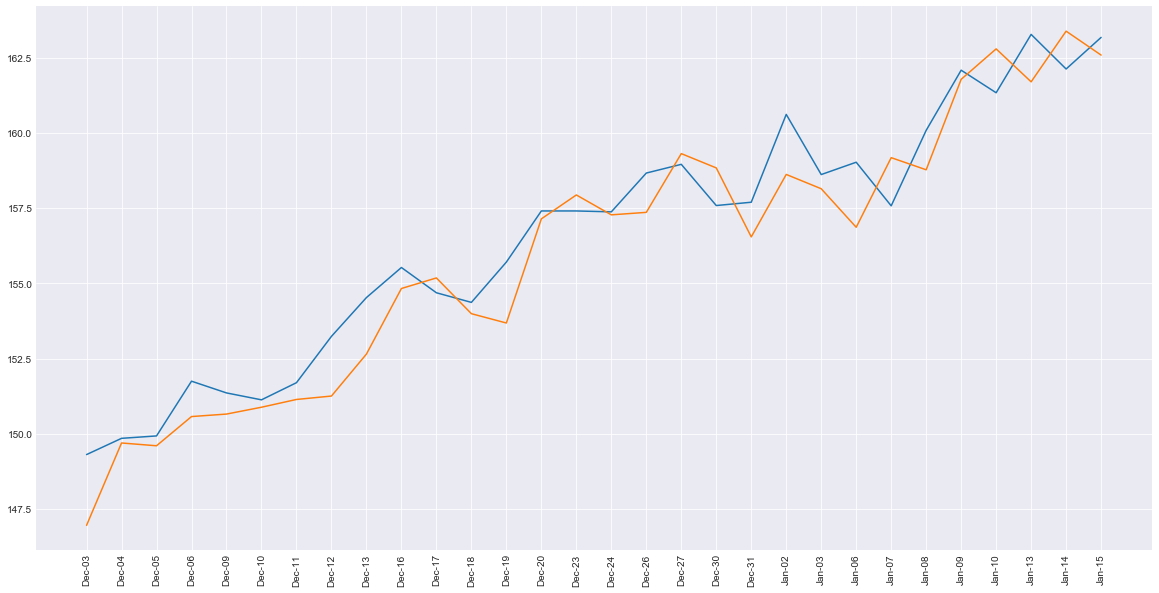

In [21]:
plt.style.use('seaborn-darkgrid')
 
plt.rc('figure', figsize=(20, 10))
# create a color palette
#plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
x = new_df.index
labels=x.strftime("%b-%d")
ax.plot(x.strftime("%b-%d"), new_df['Adj Close']);
ax.plot(x.strftime("%b-%d"), new_df['Prediction']); 
plt.xticks(x.strftime("%b-%d"), labels, rotation='vertical')

In [22]:
# ignore last 30 days will used for prediction
X = stock_df[['High', 'Low', 'Open', 'Close', 'Volume']][:-forecast_out]
y = stock_df["Adj Close"][:-forecast_out].values.reshape(-1, 1)
print(X.shape, y.shape)

(1228, 5) (1228, 1)


In [23]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(X, y,  random_state=42)

In [24]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [25]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [26]:
# Create a LinearRegression model and fit it to the scaled training data

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# predict last 30 days data
x_forecast = stock_df[['High', 'Low', 'Open', 'Close', 'Volume']][-forecast_out:]
model.fit(X_train, y_train)
lr_scaled_prediction = model.predict(x_forecast)

#scaled_df=pd.DataFrame()
#scaled_df['X_test_scaled']=X_test_scaled

# Open Price
#X_train_scaled
#lst=[]
#for i in X_train_scaled:
#    lst.append((i[3]))

#scaled_df['Adj Close']=lst

#scaled_df['Adj Close']=
#lr_prediction
scaled_df=stock_df[['Adj Close']].tail(30)

In [28]:
#lst=[]
#for i in pred1:
#    lst.append((i[0]))
#scaled_df['Predictions']=lst
#scaled_df.tail()
scaled_df['Predictions']=lr_scaled_prediction
scaled_df.tail(10)

,Adj Close,Predictions
Date,,
2020-01-02,160.619995,160.623014
2020-01-03,158.619995,158.577086
2020-01-06,159.029999,158.989384
2020-01-07,157.580002,157.585183
2020-01-08,160.089996,160.092810
2020-01-09,162.089996,162.154610
2020-01-10,161.339996,161.458106
2020-01-13,163.279999,163.376396
2020-01-14,162.130005,162.256117


In [29]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled) 
#len(pred1)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {round(MSE,6)}, R2: {round(r2,6)}")

MSE: 30.293922, R2: 0.999898


In [30]:
predict_df = stock_df

In [31]:
len(predictions) 
X_train_scaled[1]

array([ 1.19791543,  1.20617368,  1.17891767,  1.21699408, -0.16136315])

In [32]:
y_test_scaled[1]

array([-0.53754407])

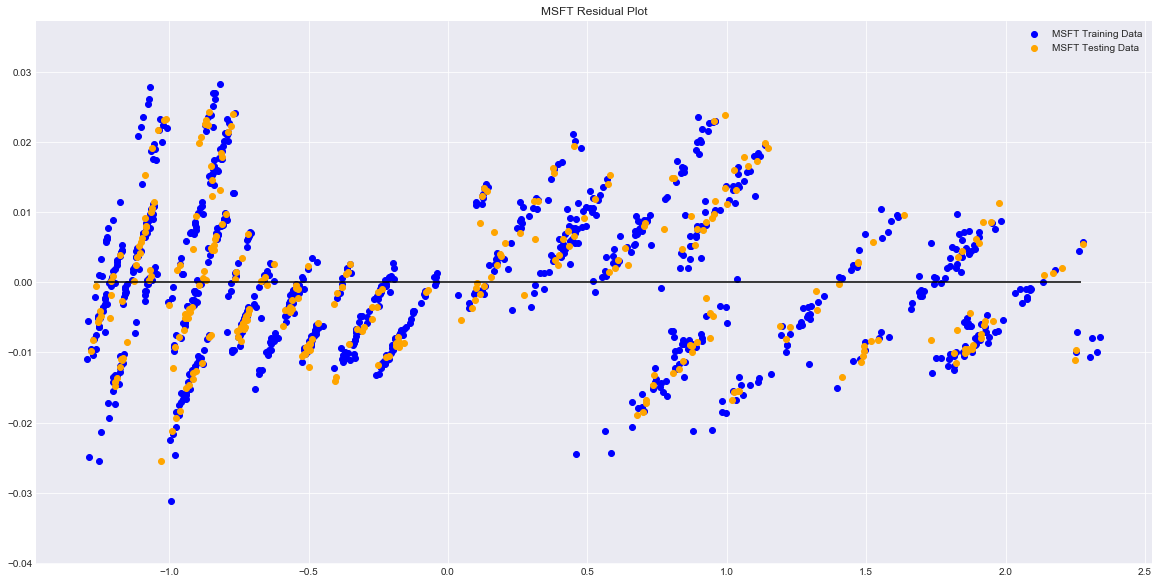

In [33]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label=f"{name} Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label=f"{name} Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title(f"{name} Residual Plot")
plt.show()

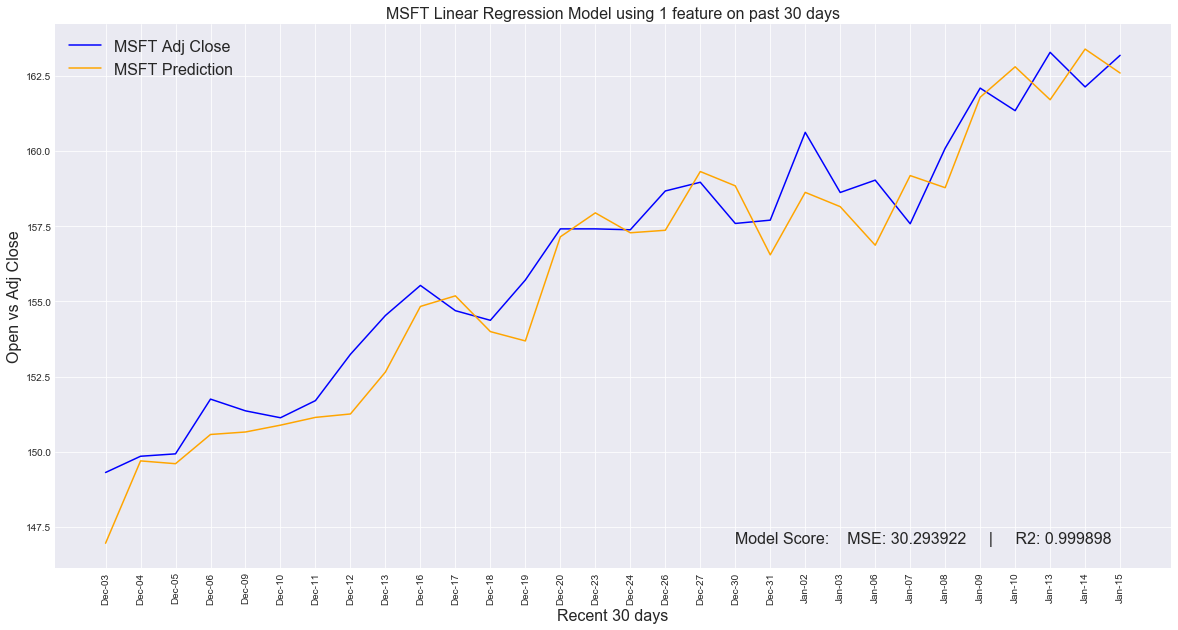

In [34]:
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(20, 10))
fig = plt.figure()

ax = plt.axes()
x = new_df.index
labels=x.strftime("%b-%d")

# ML Model using 1 feature
# plt.subplot(2, 1, 1)
ax.plot(x.strftime("%b-%d"), new_df['Adj Close'], c="blue", label=f"{name} Adj Close");
ax.plot(x.strftime("%b-%d"), new_df['Prediction'], c="orange", label=f"{name} Prediction"); 
plt.xticks(x.strftime("%b-%d"), labels, rotation='vertical')
plt.ylabel('Open vs Adj Close', fontsize = 16)
plt.xlabel("Recent 30 days", fontsize = 16)
plt.title(f"{name} Linear Regression Model using 1 feature on past 30 days", fontsize = 16)
plt.legend(fontsize = 16)
plt.text(18, min(new_df['Prediction']), f"Model Score:    MSE: {round(MSE,6)}     |     R2: {round(r2,6)}", fontsize=16)
plt.savefig(f"outputs/{name} Trained Model past 30days one feature.png")

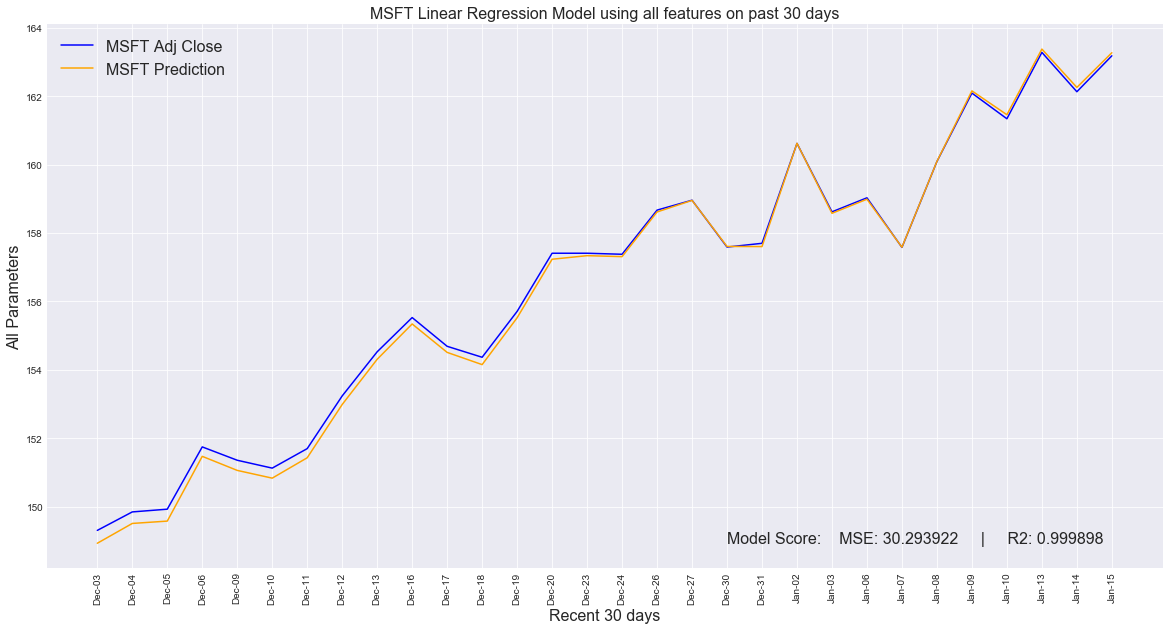

In [35]:
# ML Model using all features
fig = plt.figure()
ax = plt.axes()
x = new_df.index
labels=x.strftime("%b-%d")
# plt.subplot(2, 1, 2)
ax.plot(x.strftime("%b-%d"), scaled_df['Adj Close'].tail(30), c="blue", label=f"{name} Adj Close");
ax.plot(x.strftime("%b-%d"), scaled_df['Predictions'].tail(30), c="orange", label=f"{name} Prediction"); 
plt.xticks(x.strftime("%b-%d"), labels, rotation='vertical')
plt.ylabel('All Parameters', fontsize = 16)
plt.xlabel("Recent 30 days", fontsize = 16)
plt.title(f"{name} Linear Regression Model using all features on past 30 days", fontsize = 16)
plt.legend(fontsize = 16)
plt.text(18, min(scaled_df['Predictions']), f"Model Score:    MSE: {round(MSE,6)}     |     R2: {round(r2,6)}", fontsize=16)
plt.savefig(f"outputs/{name} Trained Model past 30days all feature.png")

In [36]:
pct_gain_loss = (scaled_df['Predictions'] -  scaled_df['Adj Close'])
pct_gain_loss

Date
2019-12-03   -0.375941
2019-12-04   -0.336648
2019-12-05   -0.348369
2019-12-06   -0.275890
2019-12-09   -0.296518
2019-12-10   -0.292952
2019-12-11   -0.267291
2019-12-12   -0.250377
2019-12-13   -0.218900
2019-12-16   -0.186905
2019-12-17   -0.177723
2019-12-18   -0.214863
2019-12-19   -0.186301
2019-12-20   -0.175515
2019-12-23   -0.071209
2019-12-24   -0.069531
2019-12-26   -0.053978
2019-12-27   -0.005548
2019-12-30    0.018803
2019-12-31   -0.095254
2020-01-02    0.003019
2020-01-03   -0.042909
2020-01-06   -0.040615
2020-01-07    0.005181
2020-01-08    0.002813
2020-01-09    0.064613
2020-01-10    0.118109
2020-01-13    0.096397
2020-01-14    0.126113
2020-01-15    0.089387
dtype: float64

In [37]:
# Per Day gain loss Actual 
currnt_pct = ((310.67-309.630005)/309.630005)*100
round(currnt_pct ,2)

0.34

In [38]:
# Per Day gain loss predicted 
#prd_pct = ((310.794221-309.618252)/309.618252)*100
#round(prd_pct ,2)
pct_2019_df=pd.DataFrame()
pct_2019_df['gain_loss_pct']=stock_df['Adj Close'].pct_change() * 100

#get history rank 
stock_rnk_df = stock_df
stock_rnk_df['gain_loss_pct']=pct_2019_df

pct_2019_df=pct_2019_df.dropna()
#nw_lst=pct_2019_df.sample(5) 
#nw_lst['gain_loss_pct'] 

stock_rnk_df=stock_rnk_df.dropna()
stock_rnk_df.tail()

,High,Low,Open,Close,Volume,Adj Close,gain_loss_pct
Date,,,,,,,
2020-01-09,162.220001,161.029999,161.839996,162.089996,21385000.0,162.089996,1.249297
2020-01-10,163.220001,161.179993,162.820007,161.339996,20725900.0,161.339996,-0.462706
2020-01-13,163.309998,161.259995,161.759995,163.279999,21626500.0,163.279999,1.202431
2020-01-14,163.600006,161.720001,163.389999,162.130005,23477400.0,162.130005,-0.704308
2020-01-15,163.940002,162.570007,162.619995,163.179993,21391800.0,163.179993,0.647621


In [39]:
# Get next 1 month Business dates  
new_dts = pd.bdate_range(start=now_time, end=end_time)
new_dts 
abj_close=[range(len(new_dts))]
future_df=pd.DataFrame({"Date":new_dts})
future_df.set_index('Date')
#future_df['future_gain_loss']=pct_2019_df.sample(5)
future_df 
future_df_rank=pd.DataFrame({"Date":new_dts})
future_df_rank.set_index('Date')

""
Date
2020-01-16
2020-01-17
2020-01-20
2020-01-21
2020-01-22
2020-01-23
2020-01-24
2020-01-27
2020-01-28


In [40]:
# Rank based on the gain loss pct 
cols = ['gain_loss_pct']
#['High','Low','Open','Close','Volume','Adj Close']
tups = stock_rnk_df[cols].sort_values(cols, ascending=False).apply(tuple, 1)
f, i = pd.factorize(tups)
factorized = pd.Series(f + 1, tups.index)

stock_rnk_df=stock_rnk_df.assign(Rank=factorized)

stock_rnk_df[stock_rnk_df['Rank']>1].sort_values(by=['Rank']).sample(5)
#stock_rnk_df['Rank'].sample(5)
#stock_rnk_df[stock_rnk_df['Rank']==1089]

# get last day actual Adj close
lst_rnk=stock_rnk_df['Rank'].tail(1)

nw_lst=pd.DataFrame()
nw_lst_rank=pd.DataFrame()
#get the next n random gain_loss_pct 
nw_lst['gain_loss_pct']=stock_rnk_df.sample(len(new_dts))['gain_loss_pct']
nw_lst_rank['gain_loss_pct']=stock_rnk_df[stock_rnk_df['Rank']>lst_rnk[0]].sort_values(by=['Rank']).sample(len(new_dts))['gain_loss_pct']
#nw_lst=pct_2019_df.sample(5) 
nw_lst['gain_loss_pct'].head()
#nw_lst.head()
stock_rnk_df[stock_rnk_df['Rank']>lst_rnk[0]].sort_values(by=['Rank']).sample(len(new_dts))['gain_loss_pct']


Date
2019-09-16   -0.720948
2019-11-21   -0.093570
2015-04-02   -1.055979
2018-02-08   -5.133358
2016-03-30    0.621468
2018-11-08   -0.187564
2015-11-27    0.447005
2018-11-14   -1.418107
2017-08-16    0.587273
2019-09-10   -1.047123
2019-05-02   -1.305905
2015-02-09   -0.117876
2015-06-12   -1.012051
2017-08-21   -0.469018
2017-02-28   -0.389232
2017-11-15   -0.777244
2015-11-24    0.110745
2019-12-30   -0.861859
2018-05-29   -0.355830
2018-12-19   -0.269305
2018-03-02    0.215408
2018-05-22   -0.102456
Name: gain_loss_pct, dtype: float64

In [41]:
nw_lst['gain_loss_pct'].head()

Date
2019-09-06   -0.678318
2015-03-25   -3.356640
2017-05-16    2.013549
2015-10-15    0.706923
2017-11-29   -1.814345
Name: gain_loss_pct, dtype: float64

In [42]:
nw_lst_rank['gain_loss_pct'].head()

Date
2018-04-06   -2.327340
2017-08-17   -1.697213
2019-03-25    0.521149
2018-10-26   -1.237305
2017-09-12   -0.107016
Name: gain_loss_pct, dtype: float64

In [43]:
# Random % from previous 5 years 
x_fut_gain_loss = [nw_lst['gain_loss_pct'][i] for i in range(len(nw_lst['gain_loss_pct']))]
#x_fut_gain_loss_rank = [nw_lst_rank['gain_loss_pct'][j] for j in range(len(nw_lst_rank['gain_loss_pct']))]

future_df['Fut_PCT']=x_fut_gain_loss
#future_df_rank['Fut_PCT']=x_fut_gain_loss_rank
future_df.head()

,Date,Fut_PCT
0,2020-01-16,-0.678318
1,2020-01-17,-3.356640
2,2020-01-20,2.013549
3,2020-01-21,0.706923
4,2020-01-22,-1.814345


In [44]:
fut_adj_open=[]
fut_adj_close=[]

# get the previous day open and close and calculated the Adj price
# for opening price just adding .05 with previous close 
fut_adj_open.append(stock_df['Adj Close'].tail(1)+ .05)
fut_adj_close.append(stock_df['Adj Close'].tail(1)+ (stock_df['Adj Close'].tail(1) * future_df['Fut_PCT'][0]/100))

for i in range(len(new_dts)-1):
    fut_adj_close.append(fut_adj_close[i]+ (fut_adj_close[i] * future_df['Fut_PCT'][i+1]/100))
    fut_adj_open.append(fut_adj_close[i]+ .05)

x_open=[i[0] for i in fut_adj_open]
x_adj=[i[0] for i in fut_adj_close]

future_df['Fut_Open']=x_open
future_df['Fut_Adj_Close']=x_adj
future_df.head()

,Date,Fut_PCT,Fut_Open,Fut_Adj_Close
0,2020-01-16,-0.678318,163.229993,162.073114
1,2020-01-17,-3.356640,162.123114,156.632903
2,2020-01-20,2.013549,156.682903,159.786783
3,2020-01-21,0.706923,159.836783,160.916352
4,2020-01-22,-1.814345,160.966352,157.996775


In [45]:
x_fut_gain_loss_rank = [nw_lst_rank['gain_loss_pct'][j] for j in range(len(nw_lst_rank['gain_loss_pct']))]
 
future_df_rank['Fut_PCT']=x_fut_gain_loss_rank
future_df_rank.head()

,Date,Fut_PCT
0,2020-01-16,-2.327340
1,2020-01-17,-1.697213
2,2020-01-20,0.521149
3,2020-01-21,-1.237305
4,2020-01-22,-0.107016


In [46]:
#x_Adj_feature=future_df.drop(['Date','Fut_PCT'])
#x_forecast = np.array(df.drop(['Adj Close'],1))[-forecast_out:]
x_Adj_feature = np.array(future_df.drop(['Date','Fut_PCT','Fut_Open'],1))
print((x_Adj_feature))

[[162.07311418]
 [156.63290258]
 [159.78678264]
 [160.91635206]
 [157.99677493]
 [157.37951122]
 [157.28064778]
 [157.921426  ]
 [156.02610806]
 [156.02610806]
 [154.29410379]
 [157.20788685]
 [157.58237335]
 [159.00232618]
 [157.39140581]
 [156.61368426]
 [152.78749208]
 [154.30495194]
 [153.50270612]
 [156.84631385]
 [154.53442068]
 [155.74128812]]


In [47]:
# Uer the regression model to predict the future predicted price
lr_fut_prediction = lr.predict(x_Adj_feature)
print(lr_fut_prediction)

[162.02695203 156.40520774 159.66432862 160.83159028 157.81459071
 157.17672973 157.07456735 157.73672749 155.7781653  155.7781653
 153.98836633 156.99937848 157.3863611  158.85369589 157.18902123
 156.38534813 152.43148098 153.99957646 153.17056076 156.62574027
 154.23670228 155.48384129]


In [48]:
future_df['Model_Predict']=lr_fut_prediction
future_df=future_df.set_index('Date')
future_df.head()

,Fut_PCT,Fut_Open,Fut_Adj_Close,Model_Predict
Date,,,,
2020-01-16,-0.678318,163.229993,162.073114,162.026952
2020-01-17,-3.356640,162.123114,156.632903,156.405208
2020-01-20,2.013549,156.682903,159.786783,159.664329
2020-01-21,0.706923,159.836783,160.916352,160.831590
2020-01-22,-1.814345,160.966352,157.996775,157.814591


In [49]:
nw=future_df[['Fut_Adj_Close','Model_Predict']]
nw.head()

,Fut_Adj_Close,Model_Predict
Date,,
2020-01-16,162.073114,162.026952
2020-01-17,156.632903,156.405208
2020-01-20,159.786783,159.664329
2020-01-21,160.916352,160.831590
2020-01-22,157.996775,157.814591


In [50]:
scaled_df.tail()
old_vs_future=scaled_df.tail(9) 

nw=future_df[['Fut_Adj_Close','Model_Predict']]
#nw=nw.rename({'Fut_Adj_Close':'Adj Close','Model_Predict':'Prediction'})
nw.columns=['Adj Close','Predictions']
old_vs_future=old_vs_future.append(nw)
old_vs_future.head(15)

,Adj Close,Predictions
Date,,
2020-01-03,158.619995,158.577086
2020-01-06,159.029999,158.989384
2020-01-07,157.580002,157.585183
2020-01-08,160.089996,160.092810
2020-01-09,162.089996,162.154610
2020-01-10,161.339996,161.458106
2020-01-13,163.279999,163.376396
2020-01-14,162.130005,162.256117
2020-01-15,163.179993,163.269380


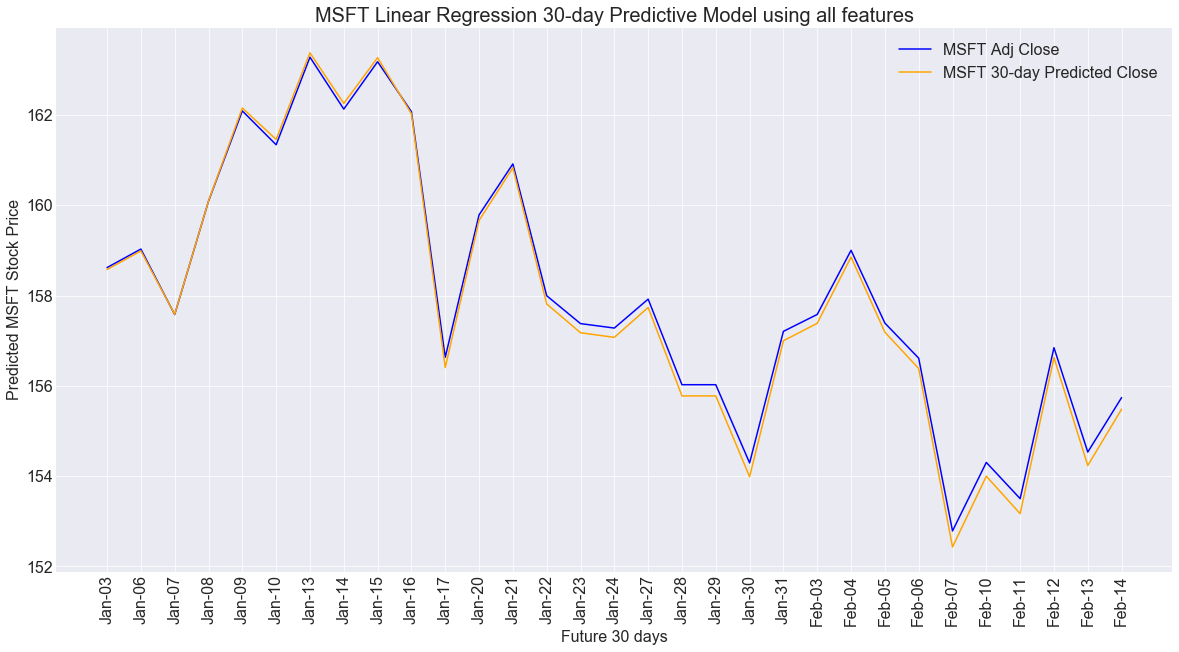

In [51]:
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(20, 10))
# create a color palette
#plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
x = old_vs_future.index
labels=x.strftime("%b-%d")
ax.plot(x.strftime("%b-%d"), old_vs_future['Adj Close'], c="blue", label=f"{name} Adj Close");
ax.plot(x.strftime("%b-%d"), old_vs_future['Predictions'], c="orange", label=f"{name} 30-day Predicted Close");
plt.xlabel("Future 30 days", fontsize = 16)
plt.ylabel(f"Predicted {name} Stock Price", fontsize = 16)
plt.xticks(x.strftime("%b-%d"), labels, rotation='vertical', fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16)
plt.title(f"{name} Linear Regression 30-day Predictive Model using all features", fontsize = 20)
plt.savefig(f"outputs/{name} 30day prediction.png")

In [52]:
fut_adj_open_rank=[]
fut_adj_close_rank=[]
# get the previous day open and close and calculated the Adj price
# for opening price just adding .05 with previous close 
 
fut_adj_open_rank.append(stock_df['Adj Close'].tail(1)+ .05)
fut_adj_close_rank.append(stock_df['Adj Close'].tail(1)+ (stock_df['Adj Close'].tail(1) * future_df_rank['Fut_PCT'][0]/100))
 
for i in range(len(new_dts)-1):
    fut_adj_close_rank.append(fut_adj_close_rank[i]+ (fut_adj_close_rank[i] * future_df_rank['Fut_PCT'][i+1]/100))
    fut_adj_open_rank.append(fut_adj_close_rank[i])    
 
x_open_rank=[j[0] for j in fut_adj_open_rank]
x_adj_rank=[j[0] for j in fut_adj_close_rank]
 
future_df_rank['Fut_Open']=x_open_rank
future_df_rank['Fut_Adj_Close']=x_adj_rank

future_df_rank.head()

,Date,Fut_PCT,Fut_Open,Fut_Adj_Close
0,2020-01-16,-2.327340,163.229993,159.382240
1,2020-01-17,-1.697213,159.382240,156.677184
2,2020-01-20,0.521149,156.677184,157.493704
3,2020-01-21,-1.237305,157.493704,155.545027
4,2020-01-22,-0.107016,155.545027,155.378570


In [53]:
x_Adj_feature_rank = np.array(future_df_rank.drop(['Date','Fut_PCT','Fut_Open'],1))
print((x_Adj_feature_rank))

[[159.38224011]
 [156.67718355]
 [157.49370448]
 [155.54502732]
 [155.3785699 ]
 [153.94465439]
 [154.35279674]
 [152.2701093 ]
 [152.59364316]
 [152.28805767]
 [151.64176158]
 [149.91071642]
 [150.75591534]
 [150.36597308]
 [146.959478  ]
 [146.84735926]
 [146.20303994]
 [146.30288778]
 [144.90391318]
 [145.15847116]
 [144.94241558]
 [144.53221395]]


In [54]:
# Uer the regression model to predict the future predicted price
lr_fut_prediction_rank = lr.predict(x_Adj_feature_rank)
print(lr_fut_prediction_rank)

[159.24628704 156.45096632 157.29473347 155.28103152 155.10901964
 153.62725627 154.04901779 151.89683382 152.23116357 151.9153811
 151.24751896 149.45871112 150.3321132  149.92915909 146.40899376
 146.29313377 145.62731436 145.73049399 144.28483746 144.5478897
 144.32462464 143.90073512]


In [55]:
future_df_rank['Model_Predict']=lr_fut_prediction_rank
future_df_rank=future_df_rank.set_index('Date')
future_df_rank.head()

,Fut_PCT,Fut_Open,Fut_Adj_Close,Model_Predict
Date,,,,
2020-01-16,-2.327340,163.229993,159.382240,159.246287
2020-01-17,-1.697213,159.382240,156.677184,156.450966
2020-01-20,0.521149,156.677184,157.493704,157.294733
2020-01-21,-1.237305,157.493704,155.545027,155.281032
2020-01-22,-0.107016,155.545027,155.378570,155.109020


In [56]:
scaled_df.tail()
old_vs_future_rank=scaled_df.tail(10) 

nw=future_df_rank[['Fut_Adj_Close','Model_Predict']]
#nw=nw.rename({'Fut_Adj_Close':'Adj Close','Model_Predict':'Prediction'})
nw.columns=['Adj Close','Predictions']
old_vs_future_rank=old_vs_future_rank.append(nw)
old_vs_future_rank.head(15)

,Adj Close,Predictions
Date,,
2020-01-02,160.619995,160.623014
2020-01-03,158.619995,158.577086
2020-01-06,159.029999,158.989384
2020-01-07,157.580002,157.585183
2020-01-08,160.089996,160.092810
2020-01-09,162.089996,162.154610
2020-01-10,161.339996,161.458106
2020-01-13,163.279999,163.376396
2020-01-14,162.130005,162.256117


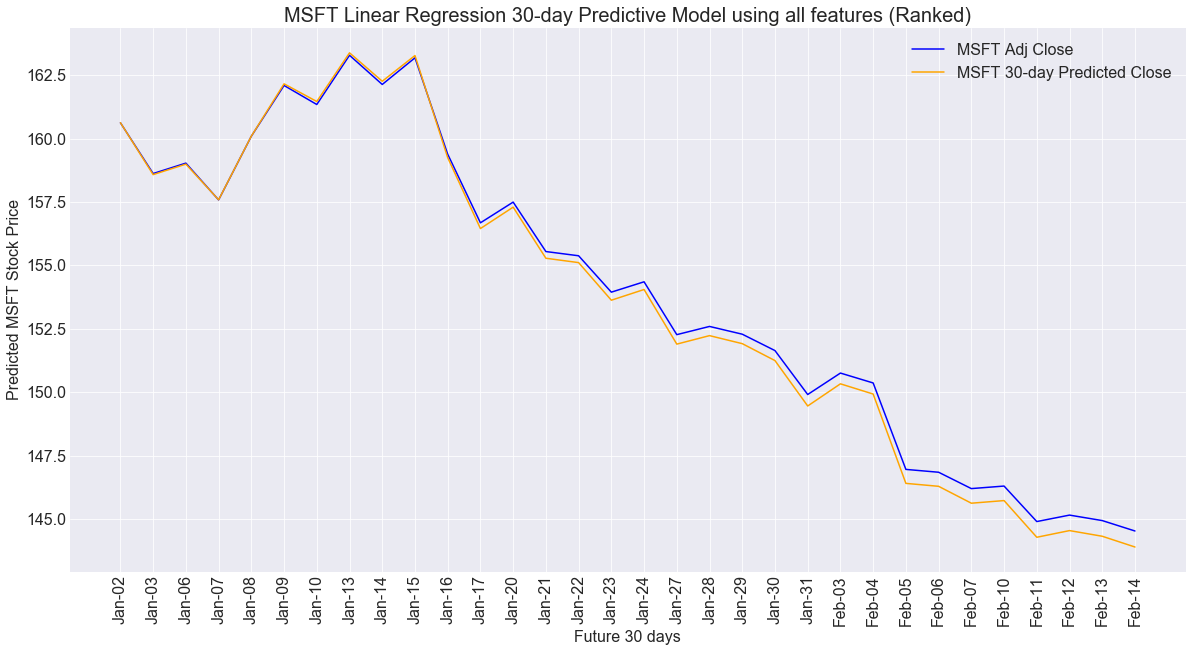

In [57]:
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(20, 10))
# create a color palette
#plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
x = old_vs_future_rank.index
labels=x.strftime("%b-%d")
ax.plot(x.strftime("%b-%d"), old_vs_future_rank['Adj Close'], c="blue", label=f"{name} Adj Close");
ax.plot(x.strftime("%b-%d"), old_vs_future_rank['Predictions'], c="orange", label=f"{name} 30-day Predicted Close");
plt.xlabel("Future 30 days", fontsize = 16)
plt.ylabel(f"Predicted {name} Stock Price", fontsize = 16)
plt.xticks(x.strftime("%b-%d"), labels, rotation='vertical', fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16)
plt.title(f"{name} Linear Regression 30-day Predictive Model using all features (Ranked)", fontsize = 20)
plt.savefig(f"outputs/{name} 30day prediction_rank.png")